# Plotting Temperature and Precipitation Graphs of Uttar Pradesh (1989-2017)

### Importing data packages

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [2]:
data = Dataset('fwdpenta1918/2017.nc', mode='r')
print (data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2018-03-26 06:09:13 GMT by grib_to_netcdf-2.7.0: grib_to_netcdf /data/data05/scratch/_mars-atls00-95e2cf679cd58ee9b4db4dd119a05a8d-pceM8s.grib -o /data/data05/scratch/_grib2netcdf-atls17-70e05f9f8ba4e9d19932f1c45a7be8d8-vFm7N4.nc -utime
    dimensions(sizes): longitude(65), latitude(65), time(24)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 t2m(time,latitude,longitude), int16 tp(time,latitude,longitude)
    groups: 



In [3]:
data.variables

OrderedDict([('longitude', <class 'netCDF4._netCDF4.Variable'>
              float32 longitude(longitude)
                  units: degrees_east
                  long_name: longitude
              unlimited dimensions: 
              current shape = (65,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('latitude', <class 'netCDF4._netCDF4.Variable'>
              float32 latitude(latitude)
                  units: degrees_north
                  long_name: latitude
              unlimited dimensions: 
              current shape = (65,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('time', <class 'netCDF4._netCDF4.Variable'>
              int32 time(time)
                  units: hours since 1900-01-01 00:00:0.0
                  long_name: time
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (24,)
              filling on, default _FillVa

So the file contains the following Variables (shape):
- Longitude (65,)
- Latitude (65,)
- Time (24,)
- 2 metre Temperature (24, 65, 65)
- Total precipitation (24,65,65)

In [4]:
lons = data.variables['longitude'][:]
lats = data.variables['latitude'][:]
t2m = data.variables['t2m'][:,:,:]
tp = data.variables['tp'][:,:,:]
t2m = t2m[0,:,:]
tp = tp[0,:,:] 

Text(0.5,1,'2 metre temperature (1989)')

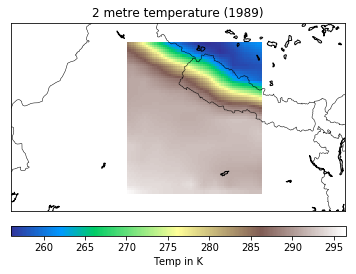

In [5]:
# Plotting T2M

map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=22,urcrnrlon=90,urcrnrlat=32, resolution='i')
lon, lat = np.meshgrid(lons, lats)
x, y = map(lon, lat)
plot = map.pcolor(x,y,np.squeeze(t2m), vmin=np.min(t2m), vmax=np.max(t2m), cmap=cm.terrain)
plot.set_edgecolor('face')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
cbar = map.colorbar(plot, location='bottom', pad="8%")
cbar.set_label('Temp in K')
cbar.ax.tick_params(labelsize=10)
plt.title('2 metre temperature (1989)')

Text(0.5,1,'Total Precipitation (1989)')

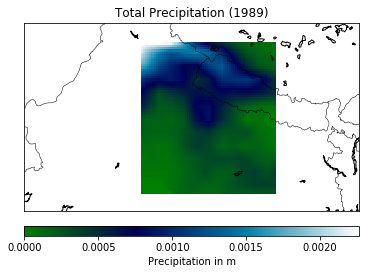

In [7]:
# Plotting TP

map = Basemap(projection='merc',llcrnrlon=70,llcrnrlat=22,urcrnrlon=90,urcrnrlat=32, resolution='i')

plot = map.pcolor(x,y,np.squeeze(tp), vmin=np.min(tp), vmax=np.max(tp), cmap=cm.ocean)
plot.set_edgecolor('face')

map.drawcoastlines()
map.drawstates()
map.drawcountries()
cbar = map.colorbar(plot, location='bottom', pad="8%")
cbar.set_label('Precipitation in m')
cbar.ax.tick_params(labelsize=10)
plt.title('Total Precipitation (1989)')

In [8]:
def temp(file):
    plot1 = map.pcolor(x,y,np.squeeze(t2m), vmin=np.min(t2m), vmax=np.max(t2m), cmap=cm.terrain)
    map.drawcoastlines()
    map.drawstates()
    map.drawcountries()
    cbar = map.colorbar(plot1, location='bottom', size="6%", pad="8%")
    cbar.set_label('Temp in K')
    cbar.ax.tick_params(labelsize=8)
    file = file[13:-3]
    plt.title('2 metre temperature {0}'.format(file))
    plt.savefig("output/T2M_{0}.png".format(file))
    cbar = None
    
def precipitation(file):
    plot2 = map.pcolor(x,y,np.squeeze(tp), vmin=np.min(tp), vmax=np.max(tp), cmap=cm.terrain)
    map.drawcoastlines()
    map.drawstates()
    map.drawcountries()
    cb = map.colorbar(plot2, location='bottom', size="6%", pad="8%")
    cb.set_label('Precipitation in m')
    cb.ax.tick_params(labelsize=8)
    file = file[13:-3]
    plt.title('Total Precipitation {0}'.format(file))
    plt.savefig("output/TP_{0}.png".format(file)) 
    cb = None

In [9]:
for file in glob.glob('fwdpenta1918/*'):
    data = Dataset(file, mode='r')
    lons = data.variables['longitude'][:]
    lats = data.variables['latitude'][:]
    t2m = data.variables['t2m'][:,:,:]
    tp = data.variables['tp'][:,:,:]
    t2m = t2m[0,:,:]
    tp = tp[0,:,:] 
    
    # Plotting t2m and tp
    map = Basemap(projection='merc', llcrnrlon=70, llcrnrlat=22, urcrnrlon=90, urcrnrlat=32, resolution='i') 
    lon, lat = np.meshgrid(lons, lats)
    x, y = map(lon, lat)
    temp(file)
    precipitation(file)